weight->independent feature
height->dependent feature
project->we gave weight and our model predict the height

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

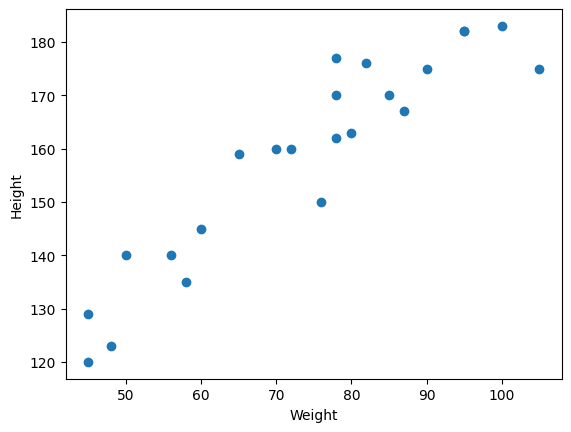

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [ ]:
#OUT AIM IS TO CREATE THE BEST FIT LINE

In [4]:
#DIVIDE DATASET INTO INDEPENDENT AND DEPENDENT FEATURES
X=df[["Weight"]]  #independent feature
y=df["Height"]  #dependent feature
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [6]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [5]:
#train and test  split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [6]:
X.shape

(23, 1)

In [7]:
X_train.shape

(18, 1)

In [8]:
#standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

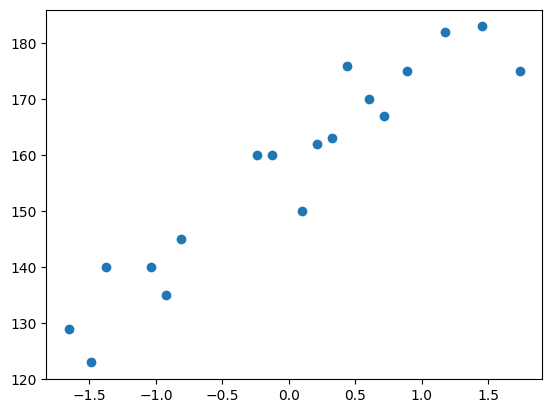

In [10]:
plt.scatter(X_train,y_train)

In [11]:
# Train the simple linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [13]:
print("the slope or coefficient of weight",regressor.coef_)
print("intercept is",regressor.intercept_)

the slope or coefficient of weight [17.03440872]
intercept is 157.5


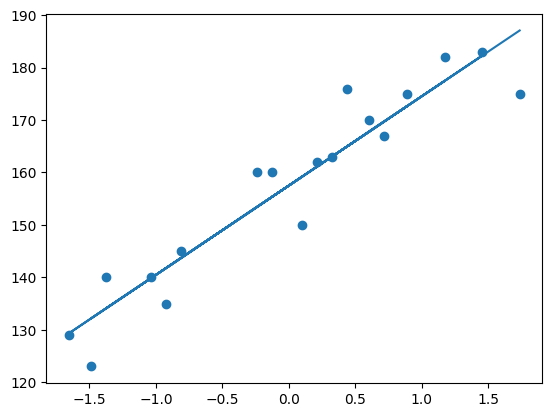

In [15]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))

->prediction of train data
1.predicted height output= intercept +coef_(Weights)
2.y_pred_train =65.4364 + 1.26(X_train)
->prediction of test data
1.predicted height output= intercept +coef_(Weights)
2.y_pred_test =65.4364 + 1.26(X_test)

In [16]:
y_pred_test=regressor.predict(X_test)
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [17]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

PERFORMANCE METRICS
MSE,MAE,RMSE
R SQUARE,ADJUSTED R SQUARE


In [19]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [22]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [23]:
#new data point weight is 80
scaled_weight=scaler.transform([[80]])
scaled_weight

e:\udemy\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [24]:
regressor.predict([scaled_weight[0]])

array([163.01076266])

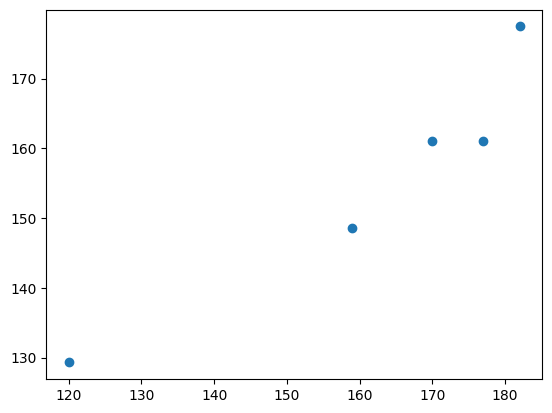

In [25]:
## Assumptions

## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test)

In [26]:
## Residuals
residuals=y_test-y_pred_test

residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_13548\3352792399.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

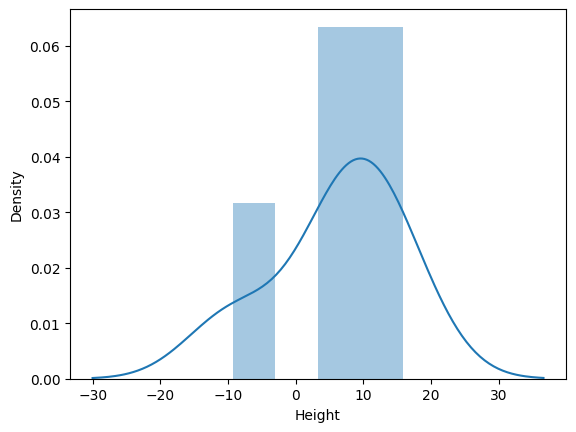

In [29]:
#plot these residuals
import seaborn as sns 
sns.distplot(residuals,kde=True)

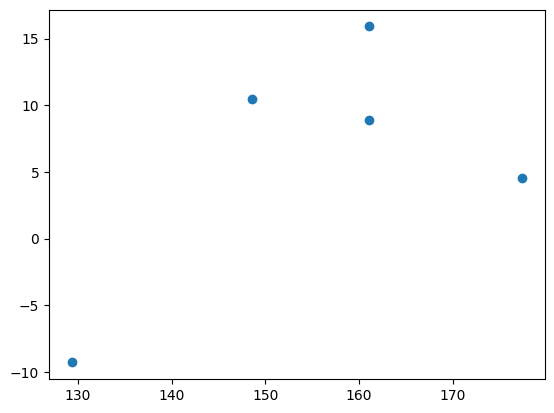

In [31]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)